In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


In [5]:
admissions = pd.read_csv("C:\\Users\\Divya\\Downloads\\admissions (1).csv")
fatalities = pd.read_csv("C:\\Users\\Divya\\Downloads\\fatalities (1).csv")
metrics = pd.read_csv("C:\\Users\\Divya\\Downloads\\metrics (1).csv")
prescriptions = pd.read_csv("C:\\Users\\Divya\\Downloads\\prescriptions (2).csv")
smokers = pd.read_csv("C:\\Users\\Divya\\Downloads\\smokers (1).csv")

admissions.head(), fatalities.head(), metrics.head(), prescriptions.head(), smokers.head()


(      Year                                         ICD10 Code  \
 0  2014/15                                          All codes   
 1  2014/15  C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...   
 2  2014/15                                            C00-D48   
 3  2014/15                                            J00-J99   
 4  2014/15                                            I00-I99   
 
                                ICD10 Diagnosis  \
 0                               All admissions   
 1  All diseases which can be caused by smoking   
 2                                  All cancers   
 3                     All respiratory diseases   
 4                     All circulatory diseases   
 
                                 Diagnosis Type                Metric  Sex  \
 0                               All admissions  Number of admissions  NaN   
 1  All diseases which can be caused by smoking  Number of admissions  NaN   
 2                                  All cancers  Number of a

In [7]:
print("Admissions info:")
print(admissions.info())
print("\nFatalities info:")
print(fatalities.info())
print("\nMetrics info:")
print(metrics.info())
print("\nPrescriptions info:")
print(prescriptions.info())
print("\nSmokers info:")
print(smokers.info())


Admissions info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2079 non-null   object
 1   ICD10 Code       2079 non-null   object
 2   ICD10 Diagnosis  2079 non-null   object
 3   Diagnosis Type   2079 non-null   object
 4   Metric           2079 non-null   object
 5   Sex              1386 non-null   object
 6   Value            2078 non-null   object
dtypes: object(7)
memory usage: 113.8+ KB
None

Fatalities info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1749 non-null   int64 
 1   ICD10 Code       1749 non-null   object
 2   ICD10 Diagnosis  1749 non-null   object
 3   Diagnosis Type   1749 non-null   object
 4   Metric           1749 non-

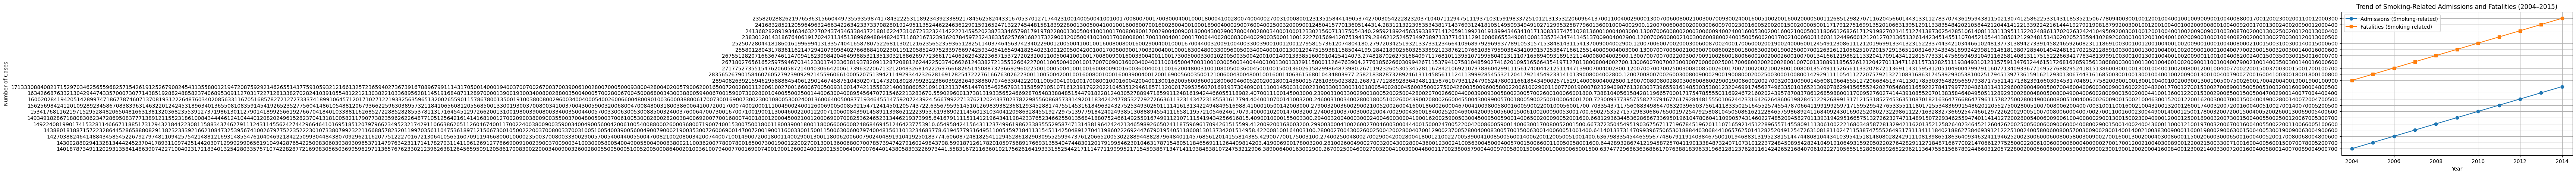

In [13]:
admissions['Year'] = admissions['Year'].astype(str).str[:4].astype(int)
fatalities['Year'] = fatalities['Year'].astype(str).str[:4].astype(int)

admissions_smoke = admissions[admissions['Diagnosis Type'].str.contains("smoking", case=False, na=False)]
fatalities_smoke = fatalities[fatalities['Diagnosis Type'].str.contains("smoking", case=False, na=False)]

admissions_summary = admissions_smoke.groupby('Year')['Value'].sum().reset_index()
fatalities_summary = fatalities_smoke.groupby('Year')['Value'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(admissions_summary['Year'], admissions_summary['Value'], marker='o', label='Admissions (Smoking-related)')
plt.plot(fatalities_summary['Year'], fatalities_summary['Value'], marker='s', label='Fatalities (Smoking-related)')
plt.title('Trend of Smoking-Related Admissions and Fatalities (2004–2015)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


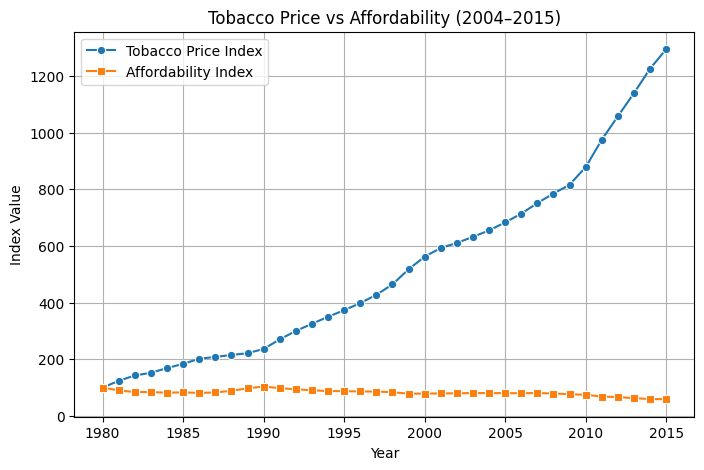

In [16]:
plt.figure(figsize=(8,5))
sns.lineplot(data=metrics, x='Year', y='Tobacco Price\nIndex', label='Tobacco Price Index', marker='o')
sns.lineplot(data=metrics, x='Year', y='Affordability of Tobacco Index', label='Affordability Index', marker='s')
plt.title('Tobacco Price vs Affordability (2004–2015)')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


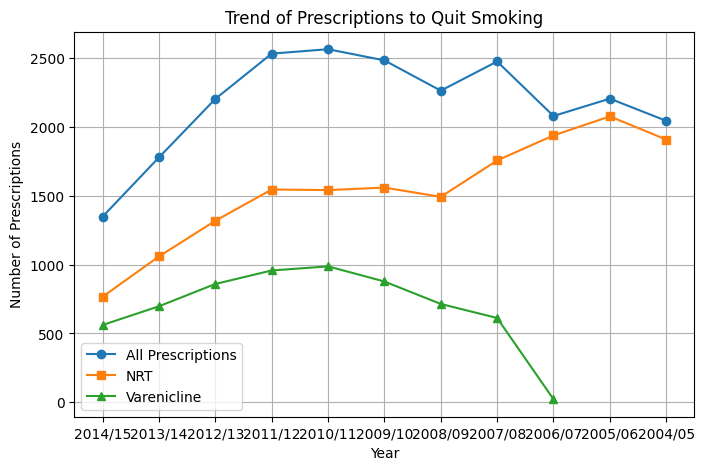

In [18]:
plt.figure(figsize=(8,5))
plt.plot(prescriptions['Year'], prescriptions['All Pharmacotherapy Prescriptions'], marker='o', label='All Prescriptions')
plt.plot(prescriptions['Year'], prescriptions['Nicotine Replacement Therapy (NRT) Prescriptions'], marker='s', label='NRT')
plt.plot(prescriptions['Year'], prescriptions['Varenicline (Champix) Prescriptions'], marker='^', label='Varenicline')
plt.title('Trend of Prescriptions to Quit Smoking')
plt.xlabel('Year')
plt.ylabel('Number of Prescriptions')
plt.legend()
plt.grid(True)
plt.show()
